In [149]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import plotly.express as px

In [148]:
pip install plotly

#### Loading & Exploring Dataset

In [126]:
data = pd.read_excel(r'C:\Users\Mannahil Miftah\Downloads\superstore.xls')
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [28]:
# dropping row id column

data.drop('Row ID',inplace=True,axis=1)
data.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [29]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [30]:
data.shape

(9994, 20)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [127]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [32]:
#printing values of all attributes to identify if any attribute has ? 

allColumns = data.columns
for c in allColumns:
    missed = data[c].isin(['?']).sum()
    if missed > 0:
        print(c, "\t", missed)

In [33]:
#checking for null values
data.isnull().values.any()

False

## ANALYSIS AND VISUALIZATION

#### Region wise Sales

In [35]:
top_regions = data.groupby('Region')['Sales'].sum()
top_regions.sort_values(ascending = False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

(-1.111985460272655,
 1.1148889262423145,
 -1.111652912479386,
 1.1043378590642272)

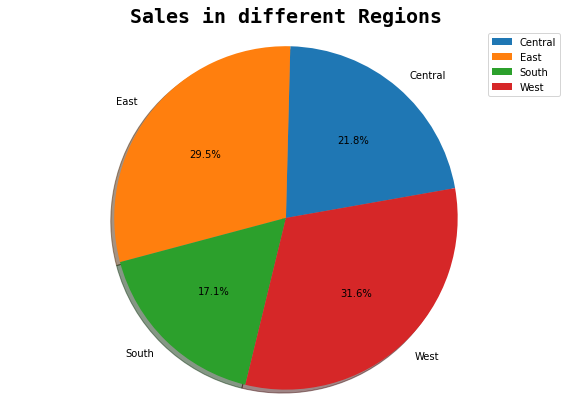

In [36]:
plt.figure(figsize=[10,7])
plt.pie(top_regions.values, labels=top_regions.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Sales in different Regions', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.axis('equal')

#### State wise Sales

In [37]:
top_10_states = data.groupby('State')['Sales'].sum()
top_10_states = pd.DataFrame(top_10_states)
top_10_states =  top_10_states.sort_values(by = ['Sales'], ascending = False)
top_10_states = top_10_states.reset_index()
top_10_states.head(2)

,State,Sales
0,California,457687.6315
1,New York,310876.2710


Text(0, 0.5, 'States')

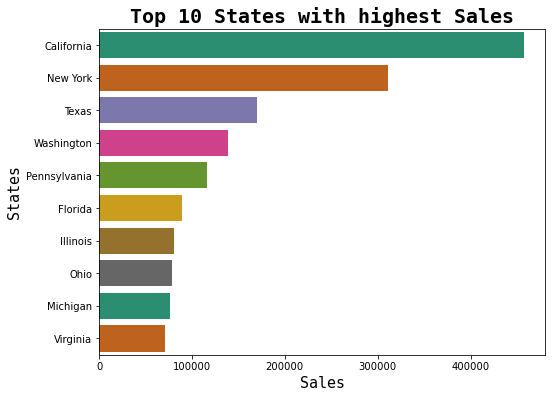

In [129]:
plt.figure(figsize=[8,6])
sb.barplot(data = top_10_states.head(10), x = 'Sales', y = "State", palette = 'Dark2')
plt.title('Top 10 States with highest Sales', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('States', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### City wise Sales

In [39]:
top_10_city = data.groupby('City')['Sales'].sum()
top_10_city = pd.DataFrame(top_10_city)
top_10_city =  top_10_city.sort_values(by = ['Sales'], ascending = False)
top_10_city = top_10_city.reset_index()
top_10_city.head(2)

,City,Sales
0,New York City,256368.161
1,Los Angeles,175851.341


Text(0, 0.5, 'City')

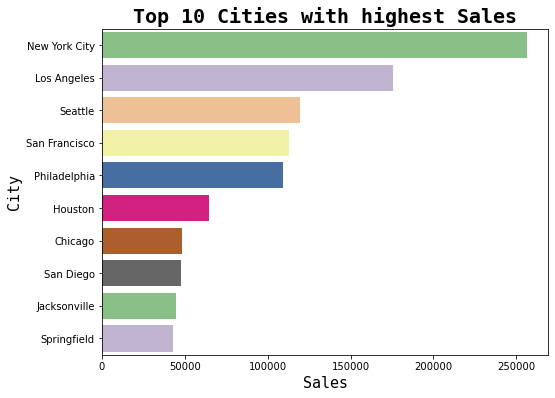

In [40]:
plt.figure(figsize=[8,6])
sb.barplot(data = top_10_city.head(10), x = 'Sales', y = "City", palette = 'Accent')
plt.title('Top 10 Cities with highest Sales', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('City', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### Segment wise Sales

In [41]:
seg = data.groupby('Segment')['Sales'].sum()
seg.sort_values(ascending = False)

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

(-1.108538725018818,
 1.1203756146753903,
 -1.1111562974085698,
 1.107824621431294)

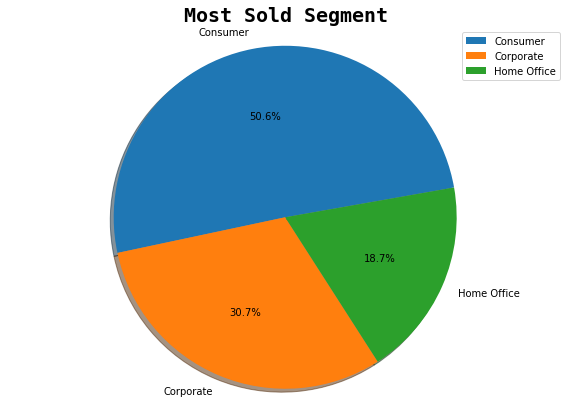

In [42]:
plt.figure(figsize=[10,7])
plt.pie(seg.values, labels=seg.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Most Sold Segment', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.axis('equal')

#### Product Category wise Sales

In [43]:
cat = data.groupby('Category')['Sales'].sum()
cat.sort_values(ascending = False).head(10)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

(-1.1077197274592372,
 1.1193567276878402,
 -1.1062549449980708,
 1.1143698714164236)

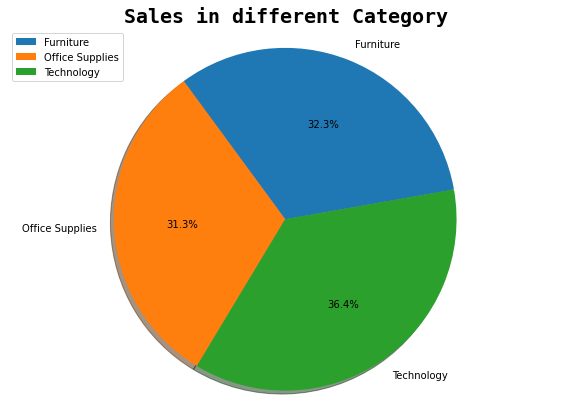

In [44]:
plt.figure(figsize=[10,7])
plt.pie(cat.values, labels=cat.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Sales in different Category', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.axis('equal')

#### Analyzing sub-category column

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Products')

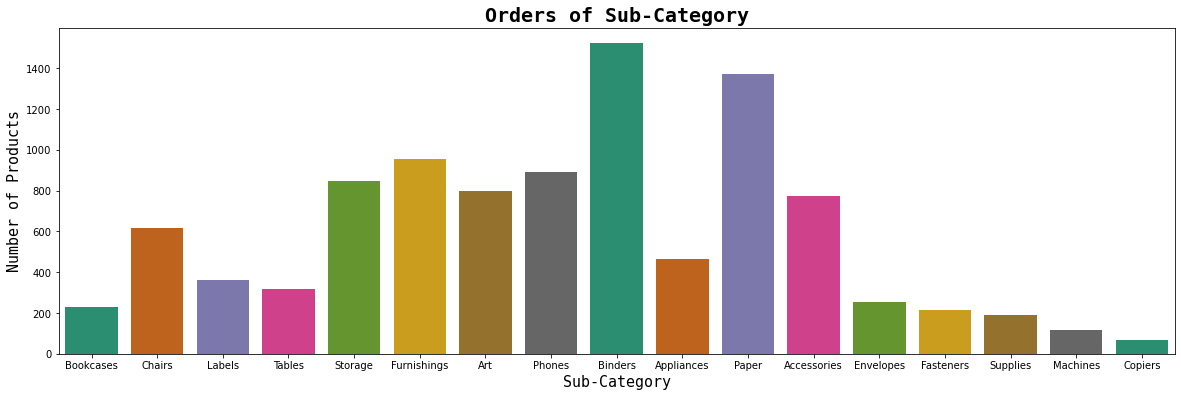

In [130]:
plt.figure(figsize=[20,6])
sb.countplot(data['Sub-Category'], palette = 'Dark2')
plt.title('Orders of Sub-Category', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sub-Category', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of Products', fontdict={'fontname':'Monospace', 'fontsize': 15,})

Text(0, 0.5, 'Sales')

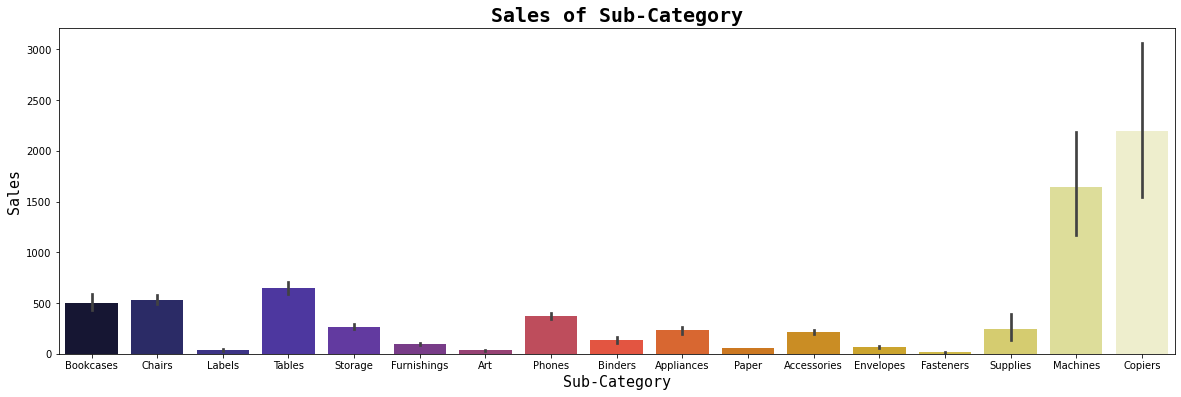

In [46]:
plt.figure(figsize=[20,6])
sb.barplot(data = data, x = 'Sub-Category', y = "Sales", palette = 'CMRmap')
plt.title('Sales of Sub-Category', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sub-Category', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### Most Popular Products

In [47]:
popular_products = pd.DataFrame(data.groupby('Product Name')['Sales'].count())
most_popular = popular_products.sort_values('Sales', ascending=False)
most_popular = most_popular.reset_index()
most_popular.head(5)

,Product Name,Sales
0,Staple envelope,48
1,Staples,46
2,Easy-staple paper,46
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,19


Text(0, 0.5, 'Product Name')

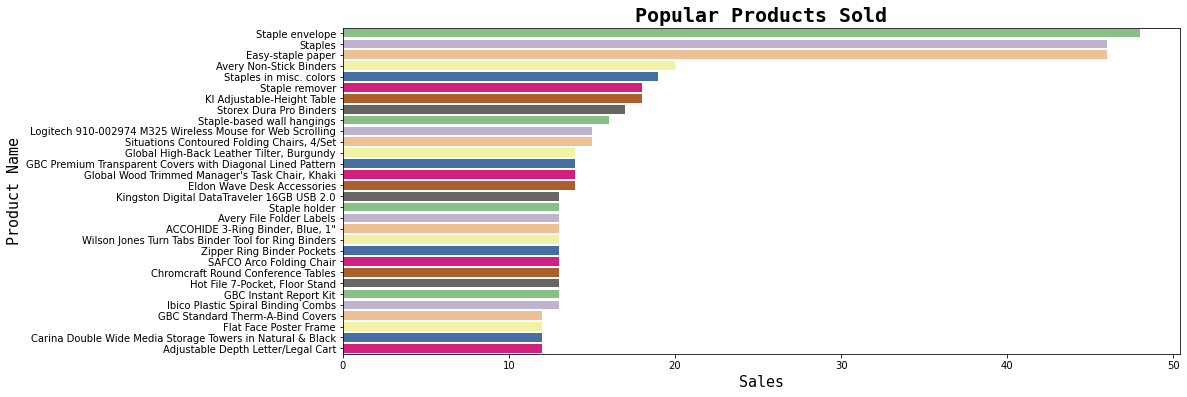

In [48]:
plt.figure(figsize=[15,6])
sb.barplot(data = most_popular.head(30), x = 'Sales', y = "Product Name", palette = 'Accent')
plt.title('Popular Products Sold', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sales', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Product Name', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### Most Profitable City

In [78]:
profitable_city = pd.DataFrame(data.groupby('City')['Profit'].sum())
most_profit = profitable_city.sort_values('Profit', ascending=False)
most_profit.head(10)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


#### Most Profitable State

In [108]:
profitable_state = pd.DataFrame(data.groupby('State')['Profit'].sum())
most_profit = profitable_state.sort_values('Profit', ascending=False)
most_profit = most_profit.reset_index()
most_profit.head(10)

,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


Text(0, 0.5, 'Profit')

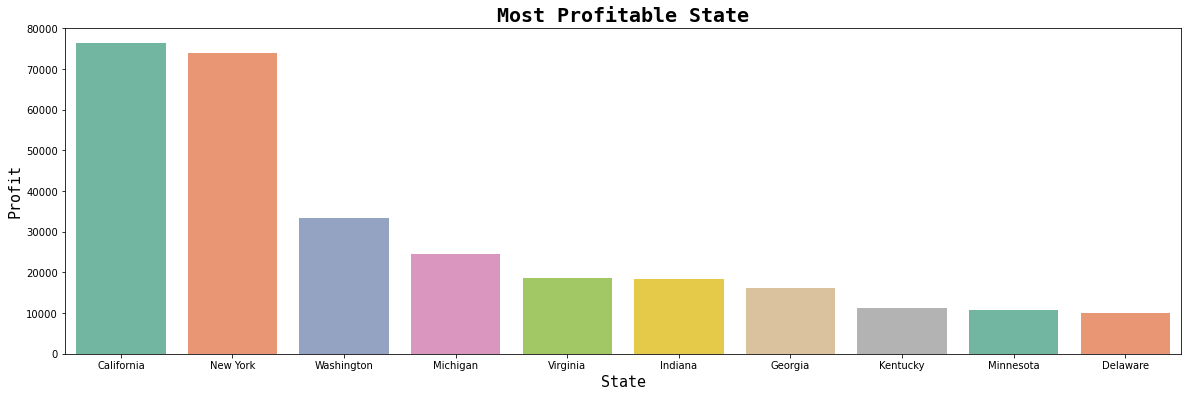

In [135]:
plt.figure(figsize=[20,6])
sb.barplot(data = most_profit.head(10), x = 'State', y = 'Profit', palette = 'Set2')
plt.title('Most Profitable State', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('State', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Profit', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### States in Loss

In [110]:
loss = profitable_state.sort_values('Profit', ascending=True)
loss = loss.reset_index()
loss.head(10)

,State,Profit
0,Texas,-25729.3563
1,Ohio,-16971.3766
2,Pennsylvania,-15559.9603
3,Illinois,-12607.8870
4,North Carolina,-7490.9122
5,Colorado,-6527.8579
6,Tennessee,-5341.6936
7,Arizona,-3427.9246
8,Florida,-3399.3017
9,Oregon,-1190.4705


Text(0, 0.5, 'Profit')

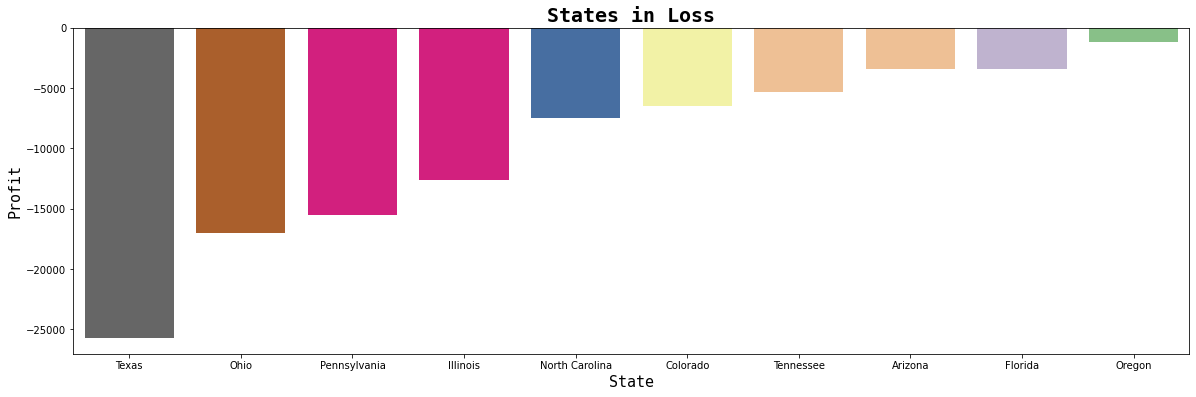

In [136]:
plt.figure(figsize=[20,6])
sb.barplot(data = loss.head(10), x = 'State', y = 'Profit', palette = 'Accent_r')
plt.title('States in Loss', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('State', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Profit', fontdict={'fontname':'Monospace', 'fontsize': 15,})

##### Comparing the plots of Profit & States w.r.t States it is observed that Texas & Illinois have good sales but loss in profit

#### Most Profitable Segment

In [151]:
px.scatter(data, x='Sales', y='Profit', color='Segment', trendline='ols')

#### Most Profitable Sub-Category

In [154]:
px.scatter(data, x='Sales', y='Profit', color='Sub-Category', trendline='ols')

#### Regression plot of Sales & Profit

c:\Users\Mannahil Miftah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sales', ylabel='Profit'>

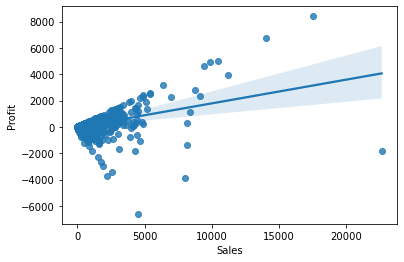

In [155]:
sb.regplot('Sales','Profit',data)

#### Number of Orders Placed w.r.t Date

Text(0, 0.5, 'Count')

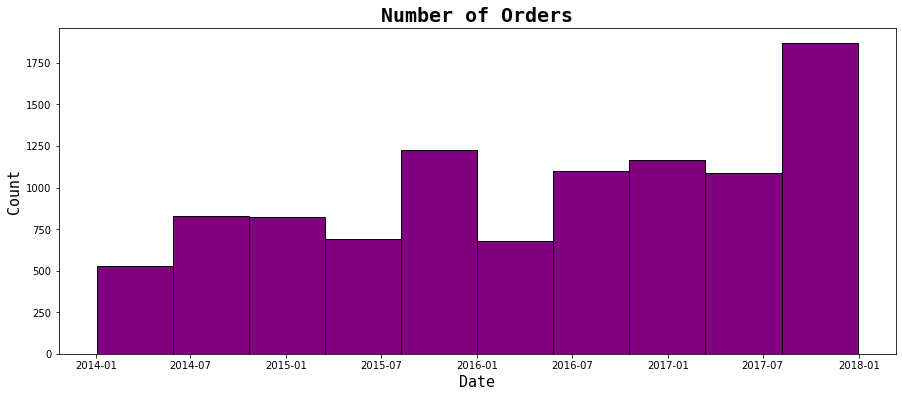

In [157]:
plt.figure(figsize=[15,6])
plt.hist(data = data, x = 'Order Date', color = 'purple', ec = 'black')
plt.title('Number of Orders', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Count', fontdict={'fontname':'Monospace', 'fontsize': 15,})

#### Heatmap

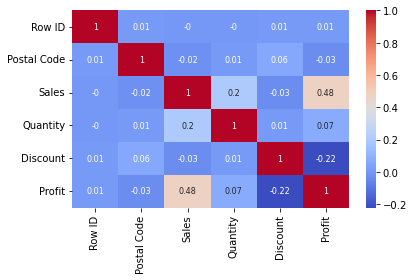

In [131]:
sb.heatmap(data=data.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

# Pre Processing data to be applied on any ML algo

In [54]:
data1 = data.copy()

In [63]:
data1 = data1.apply(LabelEncoder().fit_transform)
data1

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2500,864,929,2,143,166,0,0,194,15,217,2,12,0,4,386,4498,1,0,5975
1,2500,864,929,2,143,166,0,0,194,15,217,2,55,0,5,839,5528,2,0,7219
2,2296,732,787,2,237,201,1,0,266,3,517,3,946,1,10,1433,1092,1,0,3438
3,4372,519,568,3,705,687,0,0,153,8,170,2,319,0,16,366,5706,4,7,75
4,4372,519,568,3,705,687,0,0,153,8,170,2,1316,1,14,573,1517,1,3,2327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,138,15,12,2,737,758,0,0,295,8,169,2,200,0,9,1586,1653,2,3,2782
9990,3216,956,1033,3,190,202,0,0,104,3,555,3,164,0,9,1535,3285,1,0,4664
9991,3216,956,1033,3,190,202,0,0,104,3,555,3,1816,2,13,47,4486,1,3,4970
9992,3216,956,1033,3,190,202,0,0,104,3,555,3,1247,1,12,929,1828,3,0,4431


In [158]:
sales = data1['Sales']

In [159]:
scaler = StandardScaler().fit(data1.drop('Sales', axis = 1))
features = scaler.transform(data1.drop('Sales', axis = 1))

In [160]:
X_train, X_test, y_train, y_test = train_test_split(features, sales, test_size = 0.1)

#### Data is PROCESSED now and is READY

Text(0, 0.5, 'Inertia')

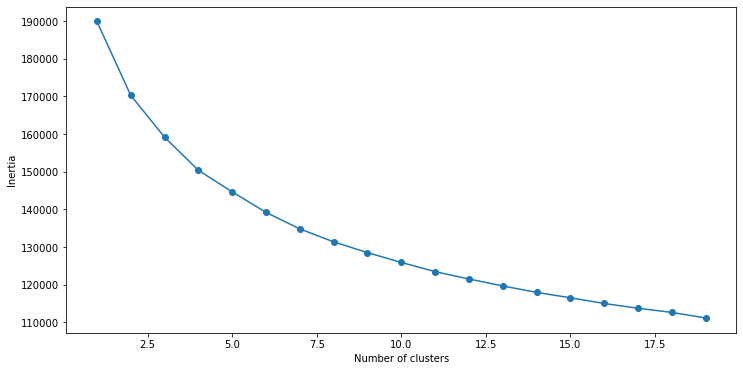

In [161]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)
pd.DataFrame(data_scaled)
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [162]:
kmeans = KMeans(n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    1751
4    1712
1    1661
3    1439
6    1312
0    1238
2     881
Name: cluster, dtype: int64